<a href="https://colab.research.google.com/github/MubasshirNaib/Fruit-and-Vegetable-detection/blob/main/Detection_of_Fruit_Vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3130 files belonging to 36 classes.


##Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))#To avoid overfitting

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
#Outpur layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 677s 6s/step - loss: 17.2361 - accuracy: 0.0339 - val_loss: 3.4902 - val_accuracy: 0.0798
Epoch 2/30
98/98 [==============================] - 136s 1s/step - loss: 4.3524 - accuracy: 0.0489 - val_loss: 3.8729 - val_accuracy: 0.0570
Epoch 3/30
98/98 [==============================] - 134s 1s/step - loss: 3.6794 - accuracy: 0.0524 - val_loss: 3.4944 - val_accuracy: 0.0627
Epoch 4/30
98/98 [==============================] - 144s 1s/step - loss: 3.8386 - accuracy: 0.0613 - val_loss: 3.3820 - val_accuracy: 0.0798
Epoch 5/30
98/98 [==============================] - 126s 1s/step - loss: 3.5662 - accuracy: 0.0696 - val_loss: 3.4477 - val_accuracy: 0.0655
Epoch 6/30
98/98 [==============================] - 137s 1s/step - loss: 3.7887 - accuracy: 0.0866 - val_loss: 3.2905 - val_accuracy: 0.1225
Epoch 7/30
98/98 [==============================] - 134s 1s/step - loss: 3.5284 - accuracy: 0.0997 - val_loss: 3.2345 - val_accuracy: 0.1083
Epoch 8/30
9

##Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
training_history.history #Return Dictionary of history

{'loss': [17.236103057861328,
  4.352417469024658,
  3.6794469356536865,
  3.838599920272827,
  3.5662002563476562,
  3.7886884212493896,
  3.5283524990081787,
  3.448664426803589,
  3.480173349380493,
  3.2032628059387207,
  3.1585774421691895,
  2.886653184890747,
  2.8536012172698975,
  2.6751444339752197,
  2.528883218765259,
  2.4002559185028076,
  2.219642400741577,
  2.132822275161743,
  2.034757614135742,
  1.943087100982666,
  1.8462913036346436,
  1.7525112628936768,
  1.708064079284668,
  1.659688115119934,
  1.5139445066452026,
  1.5106310844421387,
  1.3769495487213135,
  1.3731029033660889,
  1.253929615020752,
  1.2561640739440918],
 'accuracy': [0.03386581316590309,
  0.048881787806749344,
  0.05239616706967354,
  0.06134185194969177,
  0.06964856386184692,
  0.08658146858215332,
  0.09968051314353943,
  0.10670926421880722,
  0.12939296662807465,
  0.15015974640846252,
  0.1715654879808426,
  0.22012779116630554,
  0.24728433787822723,
  0.27667731046676636,
  0.306709

In [ ]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)


In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 76.35327577590942 %


#Accuracy Visualization

##Training Visualization

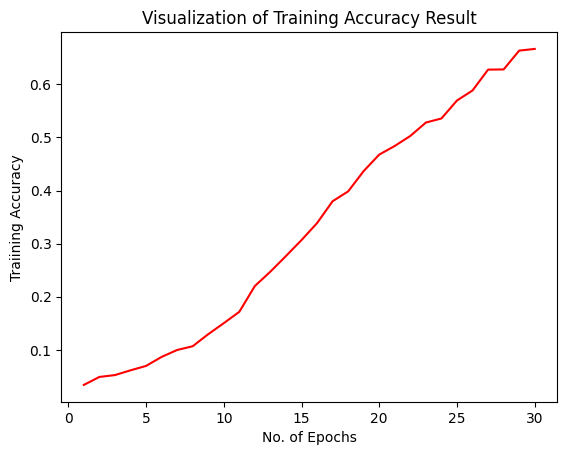

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

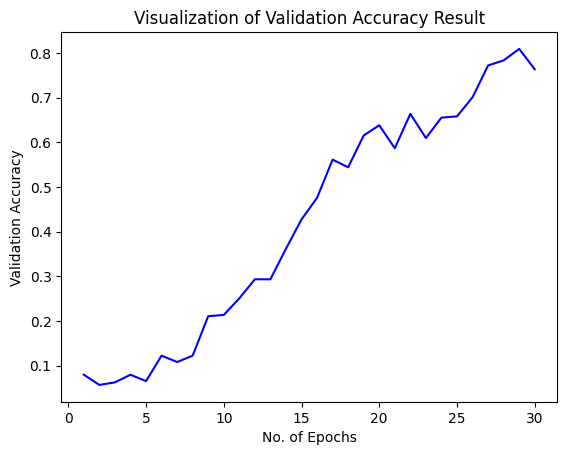

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()